In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15, 8]
matplotlib.rcParams.update({'font.size': 16})
import math
import bitstruct.c as bitstruct

In [8]:
def getDataRaw(fnames):
    data = []
    data_format=bitstruct.compile("p8s18p3p3"*(1025*8)+"u64"*(1025))
    swapformat="4"*(1025*8)+"8"*(1025)
    for fname in fnames:
        print(fname)
        with open(fname, "rb") as f:
            line = f.read(1025*10*4+1)
            while len(line) == 1025*10*4+1:
                data.extend(data_format.unpack(bitstruct.byteswap(swapformat, line)))
                #data.extend(data_format.unpack(line))
                line = f.read(1025*10*4+1)
    data = np.array(data)
    return data.reshape([-1, 9, 1025])

In [9]:
data = getDataRaw(["data_0.dat"])

data_0.dat


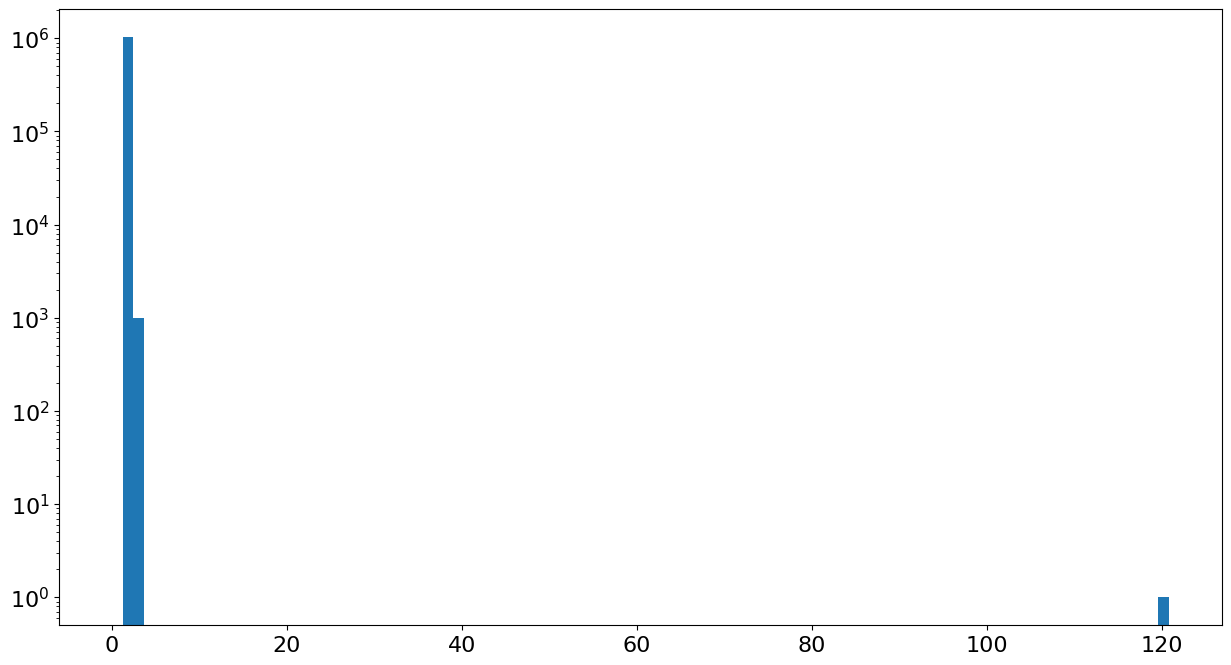

In [10]:
flat_data = data[:,8,0:].flatten()*60/1000
dt = flat_data[1:]-flat_data[:-1]
#dt = dt[4140000:4200000]
plt.hist(dt,bins=np.linspace(0, dt.max(), 100))
plt.yscale("log")
#plt.plot(dt)

data_0.dat
(1000, 9, 1025)
(128000,)


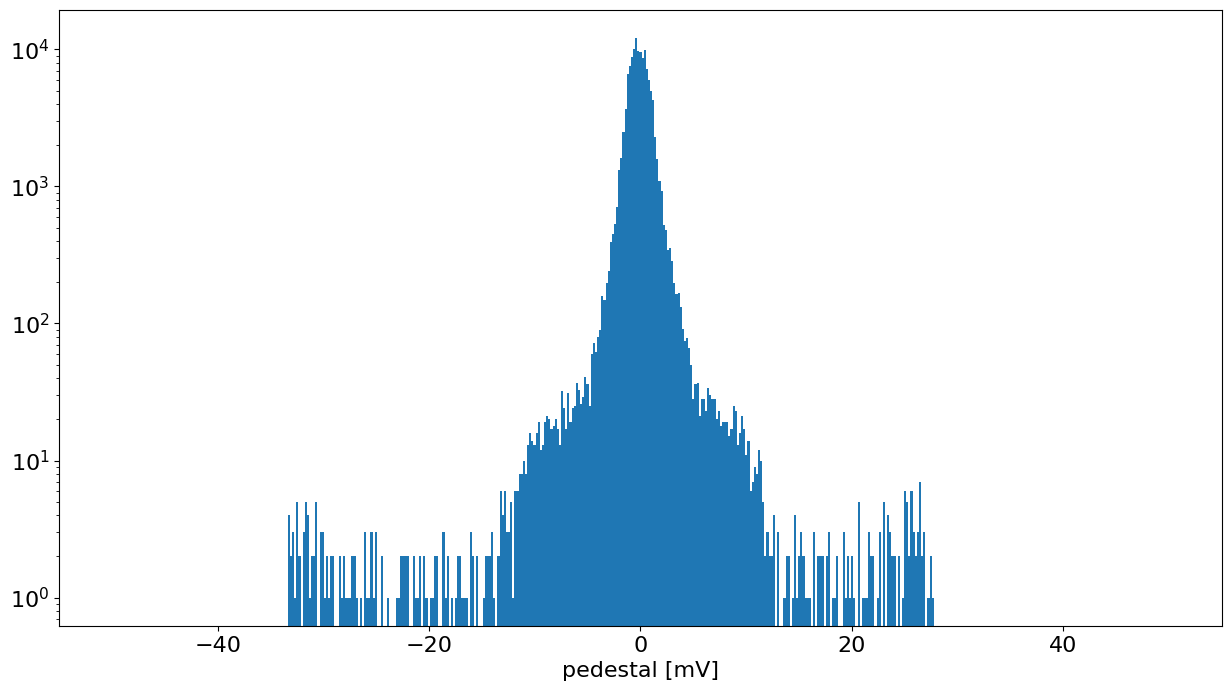

In [24]:
channel = 1
event = slice(None)
subevent = slice(None)

plt.clf()
data = getDataRaw(["data_0.dat"])
print(data.shape)
rdata=data[:,:,1:].reshape([-1, 9, int(1024/8), 8])
time = rdata[event,8,subevent,channel].flatten()*60/1000000
for chip in [0]:
    ydata = rdata[event,chip,subevent,channel].flatten()#*5/(2**18)
    print(ydata.shape)
    cut = ydata > 100000
    ydata[cut] = ydata[cut] & 0x1fff
    cut = ydata < -100000
    ydata[cut] = ydata[cut] & 0x1fff
    ydata=ydata*10000/(2**18)
    #plt.scatter(time,ydata)
    plt.hist(ydata, bins=np.linspace(-50, 50, 500))
#plt.axhline(y = 0, color = 'r', linestyle = '-')
#plt.ylim(-0.02, 0.02)
#plt.ylabel("Volts")
plt.xlabel("pedestal [mV]")
plt.yscale("log")